In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 23 12:22:38 2023

@author: vishalr
"""
import numpy as np
import pandas as pd
import pickle

# change this to the folder where you store your data
data_dir = r"/content/sample_data/"

# each of the two data frames below have 20,000 rows, each corresponding to one sample from the original graph
# each sample consists of 21 nodes; node_labels contains the names of these 21 nodes of the form Vxyz
# each node is a DNA fragment of length 500 bases; so Vxyz coveres region [500*xyz, 500*xyz+500)
# adjacency_matrix has the flattended adjacecny matrix for each of these 20,000 samples
# so each row is of dimension 21*21 = 441

# node_labels = pd.read_pickle(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix')
# adjacency_matrix = pd.read_pickle(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot')

node_labels_chr2L = np.load(data_dir + 'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr2L = np.load(data_dir + 'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

node_labels_chr2R = np.load(data_dir + 'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr2R = np.load(data_dir + 'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

node_labels_chr3L = np.load(data_dir + 'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr3L = np.load(data_dir + 'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

node_labels_chr3R = np.load(data_dir + 'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_chr3R = np.load(data_dir + 'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

# just seeing the size of input; doesn't really do anything
print("chr2L node labels shape:", node_labels_chr2L.shape)
print("chr2L adjacency matrix shape:", adjacency_matrix_chr2L.shape)
print("chr2R node labels shape:", node_labels_chr2R.shape)
print("chr2R adjacency matrix shape:", adjacency_matrix_chr2R.shape)
print("chr3L node labels shape:", node_labels_chr3L.shape)
print("chr3L adjacency matrix shape:", adjacency_matrix_chr3L.shape)
print("chr3R node labels shape:", node_labels_chr3R.shape)
print("chr3R adjacency matrix shape:", adjacency_matrix_chr3R.shape)


chr2L node labels shape: (20000, 21)
chr2L adjacency matrix shape: (20000, 442)
chr2R node labels shape: (20000, 21)
chr2R adjacency matrix shape: (20000, 442)
chr3L node labels shape: (20000, 21)
chr3L adjacency matrix shape: (20000, 442)
chr3R node labels shape: (20000, 21)
chr3R adjacency matrix shape: (20000, 442)


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas

  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.0 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.4.0 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.0 which is incompatible.
rmm-cu12 24.4.0 requires

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
# We assume that PyTorch is already installed
import torch
torchversion = torch.__version__

# Install PyTorch Scatter, PyTorch Sparse, and PyTorch Geometric
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torchversion}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torchversion}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Visualization
import networkx as nx
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# trying print the shape of the loaded array to get the number of samples
print(f'Number of samples: {adjacency_matrix_chr2L.shape[0]}')

Number of samples: 20000


In [ ]:
#part1a: delete repeated node in adjacency matrix
import numpy as np

def remove_duplicates(node_labels, adj_matrix):
    unique_nodes = []
    unique_indices = []

    for idx, node in enumerate(node_labels):
        if node not in unique_nodes:
            unique_nodes.append(node)
            unique_indices.append(idx)

    unique_nodes = np.array(unique_nodes)
    sample_adj_matrix = adj_matrix[np.ix_(unique_indices, unique_indices)]

    return unique_nodes, sample_adj_matrix

# test whether it is functioning
sample_node_labels = np.array([1, 2, 2, 3, 4, 4])
sample_adj_matrix = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1, 0]
])

cleaned_nodes, cleaned_adj_matrix = remove_duplicates(sample_node_labels, sample_adj_matrix)

print("Cleaned Nodes:", cleaned_nodes)
print("Cleaned Adjacency Matrix:\n", cleaned_adj_matrix)

Cleaned Nodes: [1 2 3 4]
Cleaned Adjacency Matrix:
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [ ]:
import numpy as np

# Define the total length of the array
total_length = 240000

# Create an array with values from 0 to 239999
all_node_indices = np.arange(total_length)

# Print to check the result
print("All node indices array:", all_node_indices)
print("Shape of all node indices array:", all_node_indices.shape)


All node indices array: [     0      1      2 ... 239997 239998 239999]
Shape of all node indices array: (240000,)


In [ ]:
# part2b：indicate nodes' class
file_indices = []

section_length = 60000
num_sections = 4

for section in range(num_sections):
    file_indices.extend([section] * section_length)

file_indices = np.array(file_indices)

# Print to check the result
print("File indices array:", file_indices)
print("Shape of file indices array:", file_indices.shape)

# Print each section to verify
print("First section (should be 0):")
print(file_indices[:section_length])

print("Second section (should be 1):")
print(file_indices[section_length:2 * section_length])

print("Third section (should be 2):")
print(file_indices[2 * section_length:3 * section_length])

print("Fourth section (should be 3):")
print(file_indices[3 * section_length:])


File indices array: [0 0 0 ... 3 3 3]
Shape of file indices array: (240000,)
First section (should be 0):
[0 0 0 ... 0 0 0]
Second section (should be 1):
[1 1 1 ... 1 1 1]
Third section (should be 2):
[2 2 2 ... 2 2 2]
Fourth section (should be 3):
[3 3 3 ... 3 3 3]


In [ ]:
#part 2c: edge list
import numpy as np
import scipy.sparse as sp

def extract_edges_from_subgraph(adjacency_matrix):
    num_nodes = 21
    edges = []

    for i in range(adjacency_matrix.shape[0]):
        # Reshape the adjacency matrix
        adj_matrix = adjacency_matrix[i, :num_nodes*num_nodes].reshape((num_nodes, num_nodes))

        for row in range(num_nodes):
            for col in range(row + 1, num_nodes):
                if adj_matrix[row, col] == 1:  # If there is an edge
                    edges.append(np.array([row, col]))

    return edges

# Extract edges from the adjacency matrices
edges_chr2L = extract_edges_from_subgraph(adjacency_matrix_chr2L)
edges_chr2R = extract_edges_from_subgraph(adjacency_matrix_chr2R)
edges_chr3L = extract_edges_from_subgraph(adjacency_matrix_chr3L)
edges_chr3R = extract_edges_from_subgraph(adjacency_matrix_chr3R)

# Print results to verify
print("Edges from chr2L:", edges_chr2L[:10])  # Print the first 10 edges as an example
print("Total edges in chr2L:", len(edges_chr2L))
print("Edges from chr2R:", edges_chr2R[:10])
print("Total edges in chr2R:", len(edges_chr2R))
print("Edges from chr3L:", edges_chr3L[:10])
print("Total edges in chr3L:", len(edges_chr3L))
print("Edges from chr3R:", edges_chr3R[:10])
print("Total edges in chr3R:", len(edges_chr3R))

all_edges = edges_chr2L + edges_chr2R + edges_chr3L + edges_chr3R

# Print the total number of edges
print("Total edges across all subgraphs:", len(all_edges))

# Save edges to a file
edges_file = 'edges.npy'
np.save(edges_file, all_edges)

# Load edges from the file to verify
loaded_edges = np.load(edges_file, allow_pickle=True)
print(f"Total edges loaded: {len(loaded_edges)}")
print(f"First 10 edges: {loaded_edges[:10]}")

Edges from chr2L: [array([0, 1]), array([0, 2]), array([1, 2]), array([2, 3]), array([3, 4]), array([4, 5]), array([4, 7]), array([4, 9]), array([ 4, 11]), array([5, 6])]
Total edges in chr2L: 722875
Edges from chr2R: [array([0, 1]), array([1, 2]), array([1, 4]), array([1, 7]), array([1, 9]), array([2, 3]), array([2, 5]), array([2, 6]), array([2, 8]), array([ 2, 10])]
Total edges in chr2R: 754087
Edges from chr3L: [array([0, 1]), array([1, 2]), array([2, 3]), array([2, 5]), array([2, 6]), array([2, 8]), array([3, 4]), array([3, 6]), array([4, 5]), array([5, 6])]
Total edges in chr3L: 679556
Edges from chr3R: [array([0, 1]), array([1, 2]), array([1, 7]), array([1, 8]), array([2, 3]), array([2, 5]), array([2, 7]), array([3, 4]), array([3, 6]), array([3, 7])]
Total edges in chr3R: 718848
Total edges across all subgraphs: 2875366
Total edges loaded: 2875366
First 10 edges: [[ 0  1]
 [ 0  2]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 4  7]
 [ 4  9]
 [ 4 11]
 [ 5  6]]


In [ ]:
# part 2d: relate edge to subgraph
import numpy as np

def extract_edges_and_indices(adjacency_matrix, class_offset):
    num_nodes = 21
    edges = []
    subgraph_indices = []

    for subgraph_idx in range(adjacency_matrix.shape[0]):
        adj_matrix = adjacency_matrix[subgraph_idx, :num_nodes*num_nodes].reshape((num_nodes, num_nodes))

        for row in range(num_nodes):
            for col in range(row + 1, num_nodes):
                if adj_matrix[row, col] == 1:  # If there is an edge
                    edges.append(np.array([row, col]))
                    subgraph_indices.append(class_offset + subgraph_idx)  # Add class offset to subgraph index

    return edges, subgraph_indices

# Load the subgraph files
data_dir = '/content/sample_data/'
adjacency_matrix_chr2L = np.load(data_dir + 'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')
adjacency_matrix_chr2R = np.load(data_dir + 'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')
adjacency_matrix_chr3L = np.load(data_dir + 'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')
adjacency_matrix_chr3R = np.load(data_dir + 'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

# Define offsets for each class
class_offsets = [0, 20000, 40000, 60000]

# Extract edges and subgraph indices from the subgraph files
edges_chr2L, subgraph_indices_chr2L = extract_edges_and_indices(adjacency_matrix_chr2L, class_offsets[0])
edges_chr2R, subgraph_indices_chr2R = extract_edges_and_indices(adjacency_matrix_chr2R, class_offsets[1])
edges_chr3L, subgraph_indices_chr3L = extract_edges_and_indices(adjacency_matrix_chr3L, class_offsets[2])
edges_chr3R, subgraph_indices_chr3R = extract_edges_and_indices(adjacency_matrix_chr3R, class_offsets[3])

# Combine all edges and subgraph indices
all_edges = edges_chr2L + edges_chr2R + edges_chr3L + edges_chr3R
all_subgraph_indices = subgraph_indices_chr2L + subgraph_indices_chr2R + subgraph_indices_chr3L + subgraph_indices_chr3R

# Save edges and subgraph indices to files
edges_file = '/content/edges.npy'
subgraph_indices_file = '/content/subgraph_indices.npy'

np.save(edges_file, all_edges)
np.save(subgraph_indices_file, all_subgraph_indices)

# Load edges and subgraph indices from the files to verify
loaded_edges = np.load(edges_file, allow_pickle=True)
loaded_subgraph_indices = np.load(subgraph_indices_file, allow_pickle=True)

print(f"Total edges loaded: {len(loaded_edges)}")
print(f"Total subgraph indices loaded: {len(loaded_subgraph_indices)}")

print(f"First 10 subgraph indices: {loaded_subgraph_indices[:10]}")
print(f"Last 10 subgraph indices: {loaded_subgraph_indices[-10:]}")



Total edges loaded: 2875366
Total subgraph indices loaded: 2875366
First 10 subgraph indices: [0 0 0 0 0 0 0 0 0 0]
Last 10 subgraph indices: [79999 79999 79999 79999 79999 79999 79999 79999 79999 79999]


In [ ]:
#Part 2e: class of subgraphs
import numpy as np

num_subgraphs_per_class = 20000
num_classes = 4
subgraph_classes = np.concatenate([np.full(num_subgraphs_per_class, i) for i in range(num_classes)])

subgraph_classes_file = '/content/subgraph_classes.npy'

np.save(subgraph_classes_file, subgraph_classes)

# Load subgraph classes from the file to verify
loaded_subgraph_classes = np.load(subgraph_classes_file, allow_pickle=True)

print(f"Shape of result: {loaded_subgraph_classes.shape}")

print(f"First 10 subgraph classes: {loaded_subgraph_classes[:10]}")
print(f"Last 10 subgraph classes: {loaded_subgraph_classes[-10:]}")

import numpy as np

task_2d_file = 'subgraph_indices.npy'
task_2d = np.load(task_2d_file, allow_pickle=True)

num_subgraphs_per_class = 20000
num_classes = 4

task_2e = (task_2d // num_subgraphs_per_class).flatten()

task_2e_file = 'task_2e.npy'
np.save(task_2e_file, task_2e)

loaded_task_2e = np.load(task_2e_file, allow_pickle=True)

print("Loaded Task 2E: ")
print(loaded_task_2e)
print("Shape of loaded Task 2E: ")
print(loaded_task_2e.shape)
print("First 10 edge classes: ", loaded_task_2e[:10])
print("Last 10 edge classes: ", loaded_task_2e[-10:])


Shape of result: (80000,)
First 10 subgraph classes: [0 0 0 0 0 0 0 0 0 0]
Last 10 subgraph classes: [3 3 3 3 3 3 3 3 3 3]


FileNotFoundError: [Errno 2] No such file or directory: 'subgraph_indices.npy'

In [ ]:
!pip install grakel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.6 MB/s eta 0:00:00


In [33]:
import torch
from torch_geometric.data import Data, DataLoader
import numpy as np
import random

def remove_duplicates(node_labels, adj_matrix):
    unique_nodes = []
    unique_indices = []

    for idx, node in enumerate(node_labels):
        if node not in unique_nodes:
            unique_nodes.append(node)
            unique_indices.append(idx)

    unique_nodes = np.array(unique_nodes)
    clean_adj_matrix = adj_matrix[np.ix_(unique_indices, unique_indices)]

    return unique_nodes, clean_adj_matrix

def create_graph_data(adjacency_matrix, node_labels, label_number):
    graphs = []

    #20% data is randomly picked for quick test
    num_samples = int(adjacency_matrix.shape[0] * 0.2)
    indices = random.sample(range(adjacency_matrix.shape[0]), num_samples)

    for i in indices:
        row = adjacency_matrix[i]
        labels = node_labels[i]

        row = row[:-1]
        adj_matrix = row.reshape((21, 21))

        labels, adj_matrix = remove_duplicates(labels, adj_matrix)

        edge_index = np.vstack(np.nonzero(adj_matrix)).astype(np.int64)
        edge_index = torch.tensor(edge_index, dtype=torch.long)

        x = torch.tensor(labels, dtype=torch.float).view(-1, 1)
        y = torch.tensor([label_number], dtype=torch.long)

        graph_data = Data(x=x, edge_index=edge_index, y=y)
        graphs.append(graph_data)

    return graphs

worklist_node_labels = [node_labels_2L, node_labels_2R, node_labels_3L, node_labels_3R]
worklist_adjacency_matrix = [adjacency_matrix_2L, adjacency_matrix_2R, adjacency_matrix_3L, adjacency_matrix_3R]

dataset = []
for label_number in range(len(worklist_adjacency_matrix)):
    adj_matrix = worklist_adjacency_matrix[label_number]
    node_labels = worklist_node_labels[label_number]
    graphs = create_graph_data(adj_matrix, node_labels, label_number)
    dataset.extend(graphs)

train_dataset = dataset[:int(len(dataset) * 0.8)]
val_dataset = dataset[int(len(dataset) * 0.8):int(len(dataset) * 0.9)]
test_dataset = dataset[int(len(dataset) * 0.9):]

print(f'Training set = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set = {len(test_dataset)} graphs')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')
    break

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')
    break

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')
    break





Training set = 12800 graphs
Validation set = 1600 graphs
Test set = 1600 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1070, 1], edge_index=[2, 2320], y=[64], batch=[1070], ptr=[65])

Validation loader:
 - Subgraph 0: DataBatch(x=[1081, 1], edge_index=[2, 2374], y=[64], batch=[1081], ptr=[65])

Test loader:
 - Subgraph 0: DataBatch(x=[1103, 1], edge_index=[2, 2406], y=[64], batch=[1103], ptr=[65])


In [ ]:
# Example: Accessing the first graph in the custom dataset
print("Number of Nodes (x):")
print(selected_dataset[0].x)  # This should include original and additional nodes
print("Edge index:")
print(selected_dataset[0].edge_index)  # This should include edges between original nodes only

Number of Nodes (x):
tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.]])
Edge index:
tensor([[ 0,  1,  1,  2,  2,  3,  3,  3,  4,  5,  5,  5,  6,  6,  7,  7,  7,  8,
          8,  8,  8,  9,  9, 10, 10, 11, 12, 12, 12, 13, 13, 14],
        [ 1,  0,  2,  1,  3,  2,  4,  5,  3,  3,  6,  7,  5,  7,  5,  6,  8,  7,
          9, 10, 12,  8, 12,  8, 11, 10,  8,  9, 13, 12, 14, 13]])


NameError: name 'selected_dataset' is not defined

In [ ]:
import matplotlib.pyplot as plt
import random
import torch_geometric.utils as tg_utils

def visualize_graphs(dataset, num_samples=25, classes=4):
    fig, axs = plt.subplots(classes, num_samples, figsize=(num_samples*2, classes*2))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    class_samples = {i: [] for i in range(classes)}

    for data in dataset:
        label = data.y.item()
        if len(class_samples[label]) < num_samples:
            class_samples[label].append(data)
        if all(len(class_samples[i]) == num_samples for i in range(classes)):
            break

    for i in range(classes):
        for j in range(num_samples):
            data = class_samples[i][j]
            adj_matrix = tg_utils.to_scipy_sparse_matrix(data.edge_index).toarray()
            ax = axs[i, j]
            ax.set_title(f'Class {i}')
            ax.imshow(adj_matrix, cmap='viridis', aspect='auto')  # Use imshow to visualize the adjacency matrix
            ax.axis('off')

    plt.show()

visualize_graphs(my_dataset)


In [8]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool


class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_h):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(my_dataset.num_node_features, dim_h)
        self.conv2 = GCNConv(dim_h, dim_h)
        self.conv3 = GCNConv(dim_h, dim_h)
        self.lin = Linear(dim_h, my_dataset.num_classes)

    def forward(self, x, edge_index, batch):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()
        h = self.conv3(h, edge_index)

        hG = global_mean_pool(h, batch)

        h = F.dropout(hG, p=0.5, training=self.training)
        h = self.lin(h)

        return hG, F.log_softmax(h, dim=1)

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(my_dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, my_dataset.num_classes)

    def forward(self, x, edge_index, batch):
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        h = torch.cat((h1, h2, h3), dim=1)

        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)

gin = GIN(dim_h=32)



In [34]:
def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 5

    model.train()
    for epoch in range(epochs+1):
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

gin = train(gin, train_loader)


Epoch 0 | Train Loss: 1.17 | Train Acc: 39.98% | Val Loss: 1.60 | Val Acc: 36.69%
Epoch 1 | Train Loss: 1.16 | Train Acc: 40.83% | Val Loss: 1.66 | Val Acc: 33.63%
Epoch 2 | Train Loss: 1.16 | Train Acc: 40.88% | Val Loss: 2.38 | Val Acc: 10.69%
Epoch 3 | Train Loss: 1.16 | Train Acc: 40.91% | Val Loss: 1.75 | Val Acc: 28.06%
Epoch 4 | Train Loss: 1.16 | Train Acc: 41.56% | Val Loss: 2.05 | Val Acc: 18.44%
Epoch 5 | Train Loss: 1.16 | Train Acc: 41.85% | Val Loss: 1.59 | Val Acc: 35.12%
Test Loss: 1.60 | Test Acc: 34.44%


ValueError: index 16 is out of bounds for array with size 16

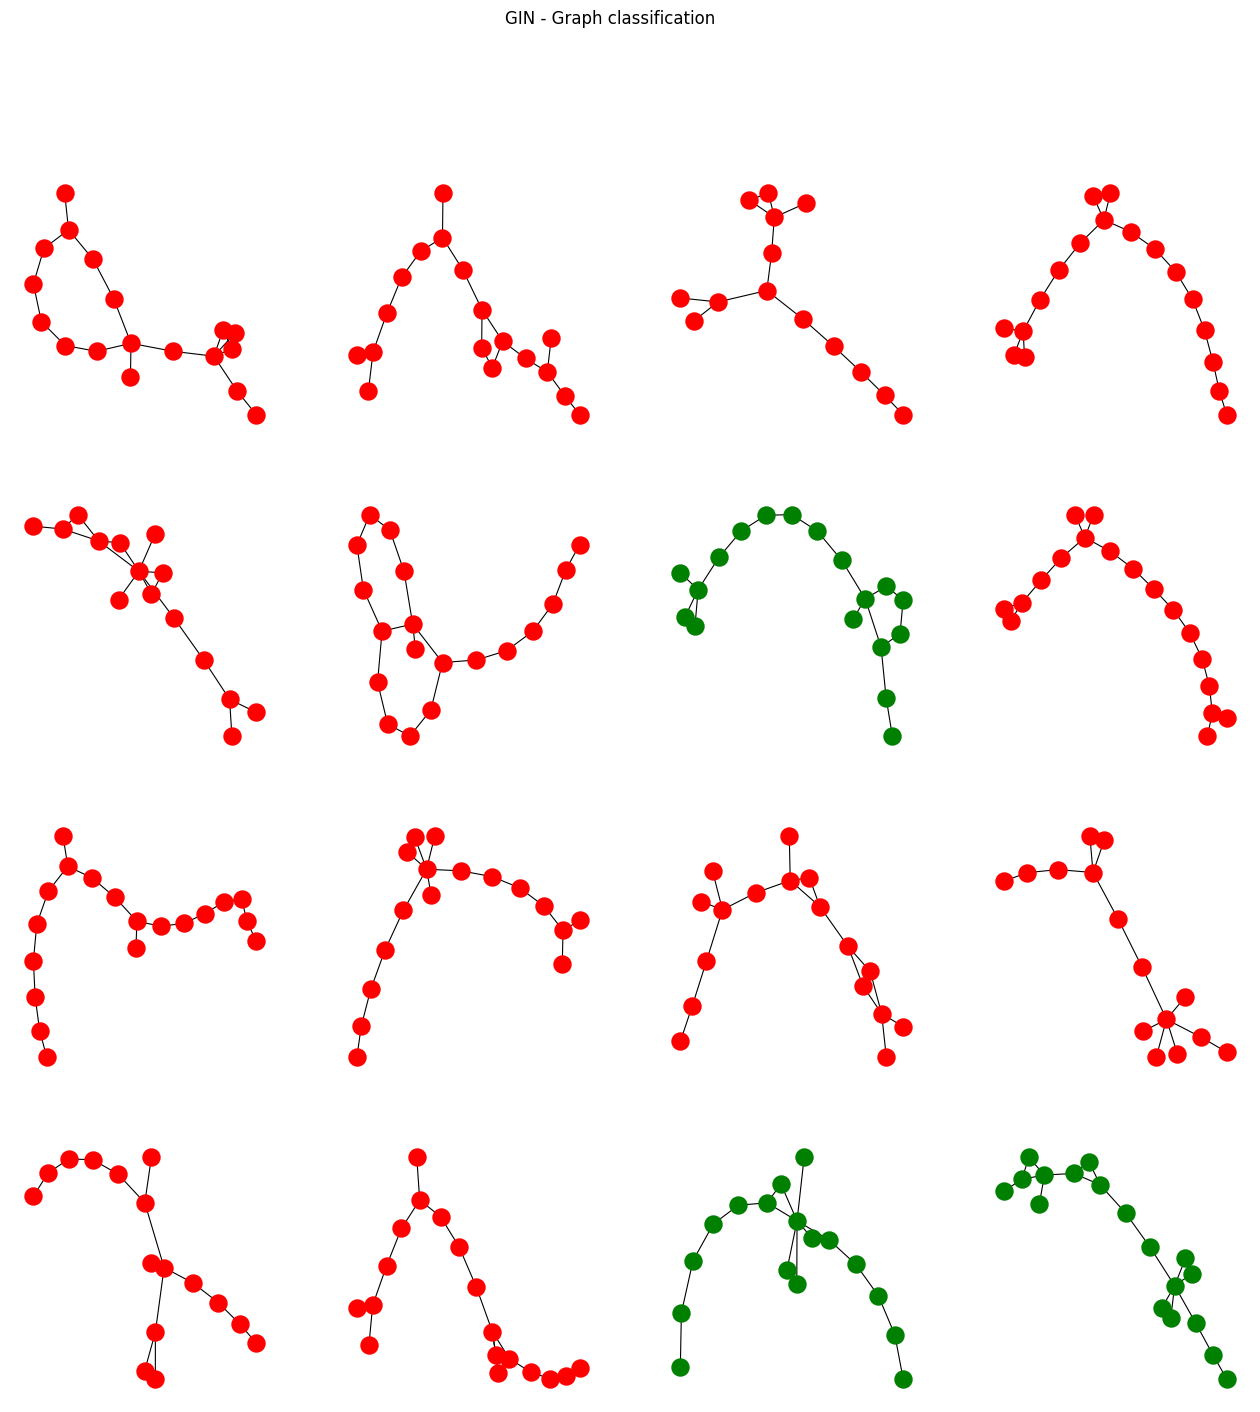

In [9]:
#sample output
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

fig, ax = plt.subplots(4, 4, figsize=(16,16))
fig.suptitle('GIN - Graph classification')

for i, data in enumerate(dataset[174 - 32:174]):
    # Calculate color (green if correct, red otherwise)
    _, out = gin(data.x, data.edge_index, data.batch)
    color = "green" if out.argmax(dim=1).item() == data.y.item() else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                     pos=nx.spring_layout(G, seed=0),
                     with_labels=False,
                     node_size=150,
                     node_color=color,
                     width=0.8,
                     ax=ax[ix]
                     )

plt.show()

In [ ]:

label_mapping = {0: '2L', 1: '2R', 2: '3L', 3: '3R'}


import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx


fig, ax = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('GIN - Graph classification')

for i, data in enumerate(dataset[1113-16:]):
    _, out = gin(data.x, data.edge_index, data.batch)
    predicted_class = out.argmax(dim=1).item()
    actual_class = data.y.item()
    color = "green" if predicted_class == actual_class else "red"

    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[1113-16+i], to_undirected=True)
    nx.draw_networkx(G,
                     pos=nx.spring_layout(G, seed=0),
                     with_labels=False,
                     node_size=150,
                     node_color=color,
                     width=0.8,
                     ax=ax[ix])

    classification_text = f"Predicted: {label_mapping[predicted_class]}, Actual: {label_mapping[actual_class]}"
    ax[ix].text(0.5, 0.9, classification_text, horizontalalignment='center', verticalalignment='center', transform=ax[ix].transAxes, color='black')

plt.show()


ModuleNotFoundError: No module named 'torch_geometric'